In [3]:
import pathlib
from importlib.resources import files
from pivpy import io, pivpy, graphics

In [4]:
import xarray as xr
from typing import List 
import numpy as np
import matplotlib.pyplot as plt

from pivpy.graphics import quiver

In [5]:
data = io.create_sample_Dataset(n_frames=2)
data

<xarray.Dataset> Size: 5kB
Dimensions:  (y: 10, x: 11, t: 2)
Coordinates:
  * y        (y) float64 80B 0.0 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0
  * x        (x) float64 88B 0.0 20.0 40.0 60.0 80.0 ... 140.0 160.0 180.0 200.0
  * t        (t) float64 16B 0.0 1.0
Data variables:
    u        (y, x, t) float64 2kB 1.0 1.0 2.0 2.0 3.0 ... 10.0 10.0 11.0 11.0
    v        (y, x, t) float64 2kB 1.0 1.0 1.0 1.0 1.0 ... 10.0 10.0 10.0 10.0
    chc      (y, x, t) float64 2kB 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes: (2)

In [7]:
data["t"].shape

(2,)

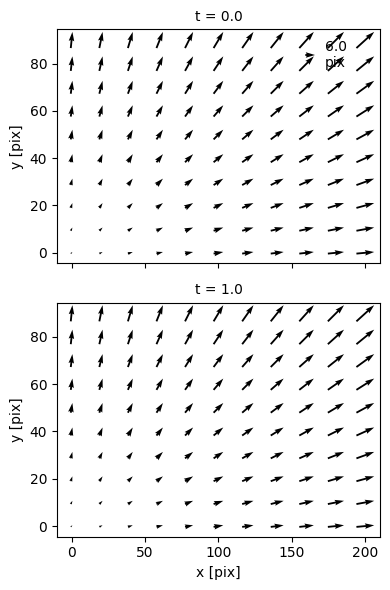

In [9]:
data.plot.quiver(x='x',y='y',u='u',v='v',row='t',scale=200)

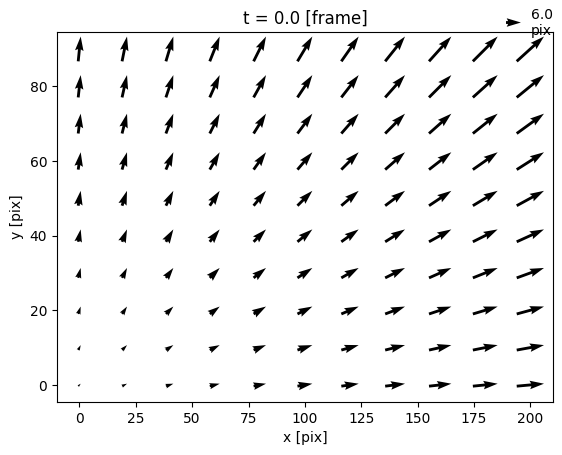

In [10]:
data.isel(t=0).plot.quiver(x='x',y='y',u='u',v='v',scale=200)

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x [pix]', ylabel='y [pix]'>)

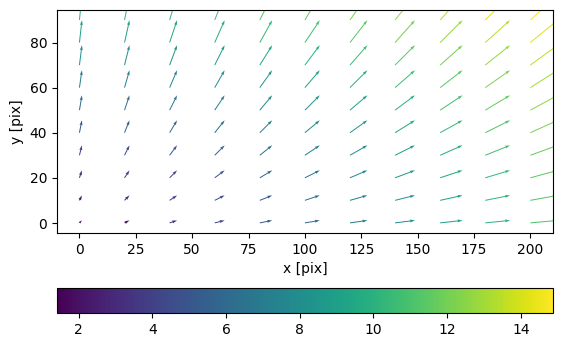

In [13]:
quiver(data, colorbar=True, colorbar_orient='horizontal', scalingFactor=200)

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x [pix]', ylabel='y [pix]'>)

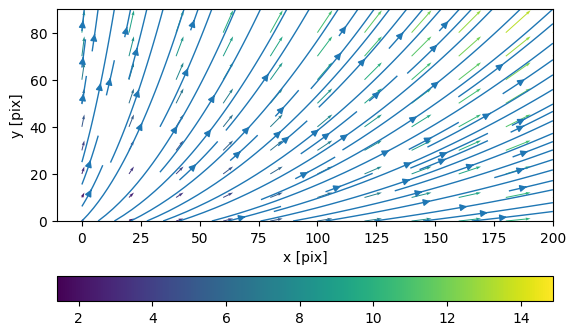

In [15]:
quiver(data,colorbar=True, colorbar_orient='horizontal', streamlines=True, scalingFactor=200)

In [17]:
ds = io.load_directory(
    pathlib.Path(files('pivpy').joinpath('data/PIV_Challenge')),
    ext='txt',
)

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x [pix]', ylabel='y [pix]'>)

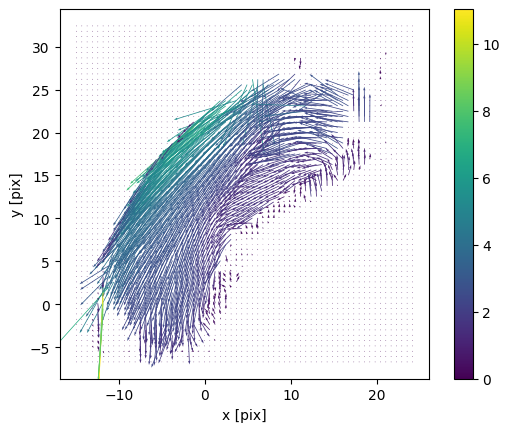

In [28]:
ds.isel(t=0).piv.quiver(scalingFactor=30, colorbar=True, colorbar_orient='vertical', streamlines=True)

(<Figure size 640x480 with 2 Axes>, <Axes: >)

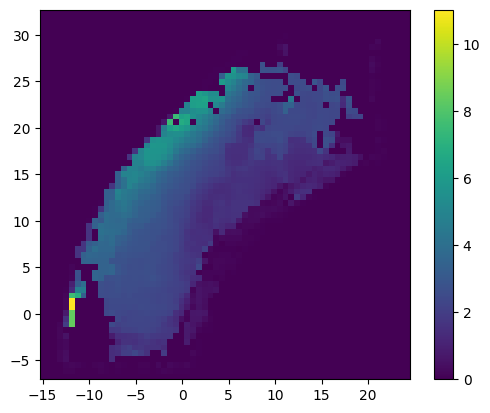

In [29]:
graphics.contour_plot(ds.isel(t=0),colorbar=True)

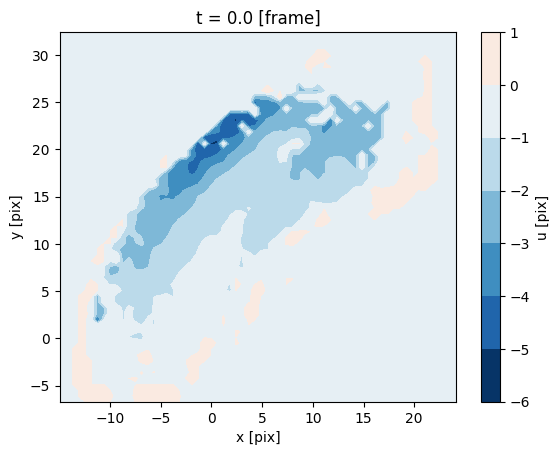

In [30]:
fig, ax = plt.subplots()
ds["u"].isel(t=0).plot.contourf(ax=ax)

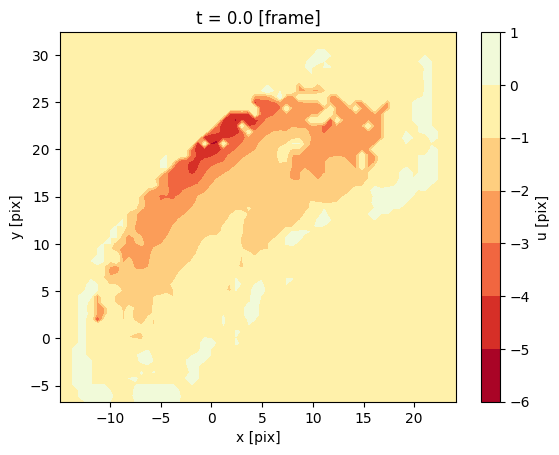

In [31]:
fig, ax = plt.subplots()
c = ds["u"].isel(t=0).plot.contourf(
    x='x',
    y='y',
    cmap=plt.get_cmap("RdYlBu"),
    ax=ax,
)

In [33]:
filename = pathlib.Path(files("pivpy").joinpath("data/Insight/Run000001.T000.D000.P000.H001.L.vec"))
# load data
_d = io.load_vec(filename)
_d

<xarray.Dataset> Size: 96kB
Dimensions:  (y: 63, x: 63, t: 1)
Coordinates:
  * y        (y) float64 504B -0.3125 -0.625 -0.9374 ... -19.06 -19.37 -19.69
  * x        (x) float64 504B 0.3125 0.625 0.9374 1.25 ... 19.06 19.37 19.69
  * t        (t) float64 8B 1.0
Data variables:
    u        (y, x, t) float64 32kB 0.0 0.0 0.0 0.0 0.0 ... 0.04401 0.0 0.0 0.0
    v        (y, x, t) float64 32kB -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0
    chc      (y, x, t) float64 32kB -1.0 -1.0 -1.0 -1.0 ... 1.0 -3.0 -3.0 -3.0
Attributes: (2)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x [pix]', ylabel='y [pix]'>)

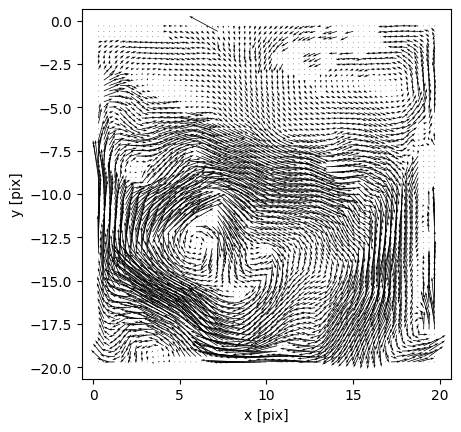

In [34]:
graphics.quiver(_d)

In [35]:
if "t" in _d.coords:
    _d = _d.isel(t=0)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x [pix]', ylabel='y [pix]'>)

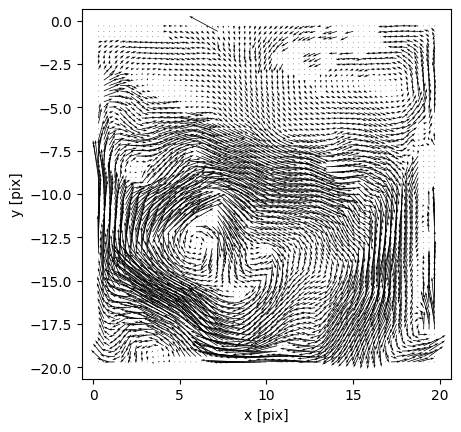

In [36]:
graphics.quiver(_d)

In [37]:
_d

<xarray.Dataset> Size: 96kB
Dimensions:  (y: 63, x: 63)
Coordinates:
  * y        (y) float64 504B -0.3125 -0.625 -0.9374 ... -19.06 -19.37 -19.69
  * x        (x) float64 504B 0.3125 0.625 0.9374 1.25 ... 19.06 19.37 19.69
    t        float64 8B 1.0
Data variables:
    u        (y, x) float64 32kB 0.0 0.0 0.0 0.0 0.0 ... 0.04401 0.0 0.0 0.0
    v        (y, x) float64 32kB -0.0 -0.0 -0.0 -0.0 ... 0.01079 -0.0 -0.0 -0.0
    chc      (y, x) float64 32kB -1.0 -1.0 -1.0 -1.0 -1.0 ... 1.0 -3.0 -3.0 -3.0
Attributes: (2)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x [pix]', ylabel='y [pix]'>)

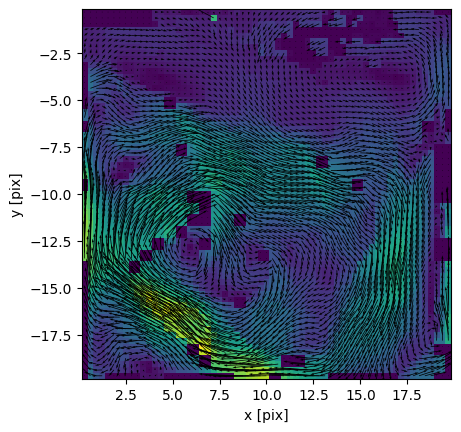

In [43]:
d = _d.piv.vec2scal('vorticity')
fig, ax = graphics.contour_plot(d)
graphics.quiver(d, scalingFactor=1, ax=ax)

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x [pix]', ylabel='y [pix]'>)

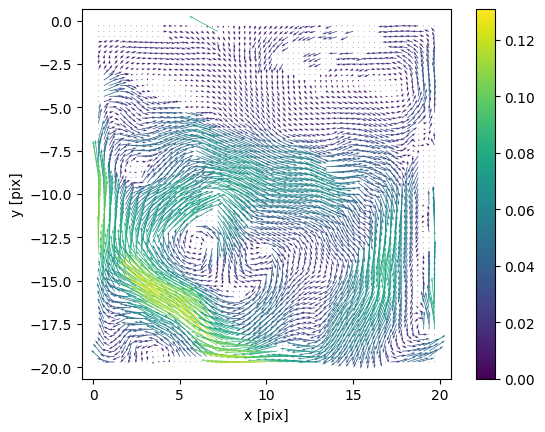

In [44]:
graphics.showf(d,colorbar=True)

In [45]:
data = io.create_sample_Dataset()
tmp = data.piv.average

In [46]:
tmp

<xarray.Dataset> Size: 3kB
Dimensions:  (y: 10, x: 11)
Coordinates:
  * y        (y) float64 80B 0.0 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0
  * x        (x) float64 88B 0.0 20.0 40.0 60.0 80.0 ... 140.0 160.0 180.0 200.0
Data variables:
    u        (y, x) float64 880B 1.0 2.0 3.0 4.0 5.0 ... 7.0 8.0 9.0 10.0 11.0
    v        (y, x) float64 880B 1.0 1.0 1.0 1.0 1.0 ... 10.0 10.0 10.0 10.0
    chc      (y, x) float64 880B 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes: (2)

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x [pix]', ylabel='y [pix]'>)

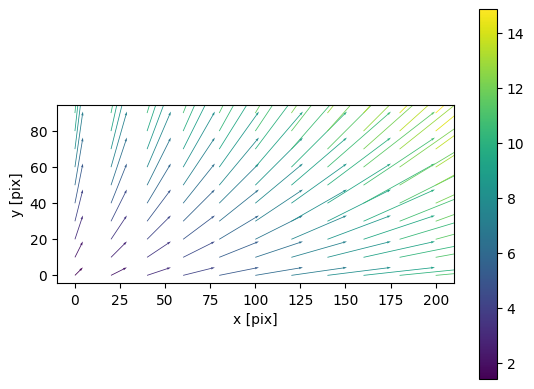

In [49]:
graphics.quiver(tmp, scalingFactor=50, colorbar=True)